# IMAGE SEGMENTATION USING CLUSTERING
### Definition: Partitioning an image into regions by grouping similar pixels using clustering.

## Steps:
1. Extract Features: Represent each pixel (e.g., RGB values).
2. Apply Clustering: Use algorithms like K-Means to group pixels.
3. Segment Image: Replace pixels with cluster labels or centroids.

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image_path = r'C:\Users\sinch\Downloads\clust.jpg'
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image file not found at {image_path}")

# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Reshape the image to a 2D array of pixels
pixel_values = lab_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the number of clusters (k)
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(pixel_values)
centers = np.uint8(kmeans.cluster_centers_)

# Map the centers (mean colors) to the original image's pixels
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(lab_image.shape)

# Convert back to BGR color space
segmented_image_bgr = cv2.cvtColor(segmented_image, cv2.COLOR_LAB2BGR)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(segmented_image_bgr, cv2.COLOR_BGR2RGB))

plt.show()

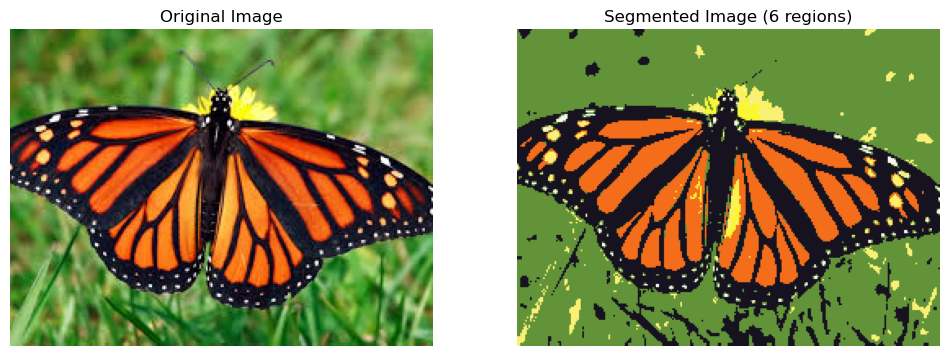

In [8]:
import numpy as np
import cv2
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread( r'C:\Users\sinch\Downloads\clust.jpg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels and 3 color values (RGB)
flat_image = image.reshape((-1, 3))

# Estimate the bandwidth for Mean Shift
bandwidth = estimate_bandwidth(flat_image, quantile=0.1, n_samples=500)

# Apply Mean Shift Clustering
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(flat_image)

# Retrieve labels and cluster centers
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# Map each pixel to its cluster's mean color
segmented_image = cluster_centers[labels].astype(np.uint8)
segmented_image = segmented_image.reshape(image.shape)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image ({len(np.unique(labels))} regions)")
plt.imshow(segmented_image)
plt.axis("off")

plt.show()


C:\Users\sinch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


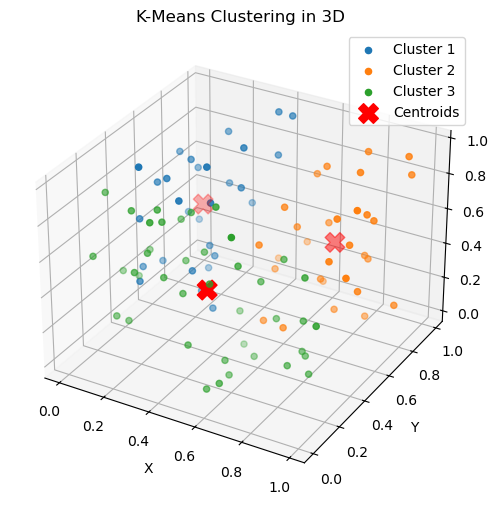

In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample 3D data
np.random.seed(42)
data = np.random.rand(100, 3)  # 100 points in 3D space

# Specify the number of clusters
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
for i in range(n_clusters):
    cluster_points = data[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f"Cluster {i+1}")

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, c='red', marker='X', label='Centroids')

# Add labels and legend
ax.set_title("K-Means Clustering in 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


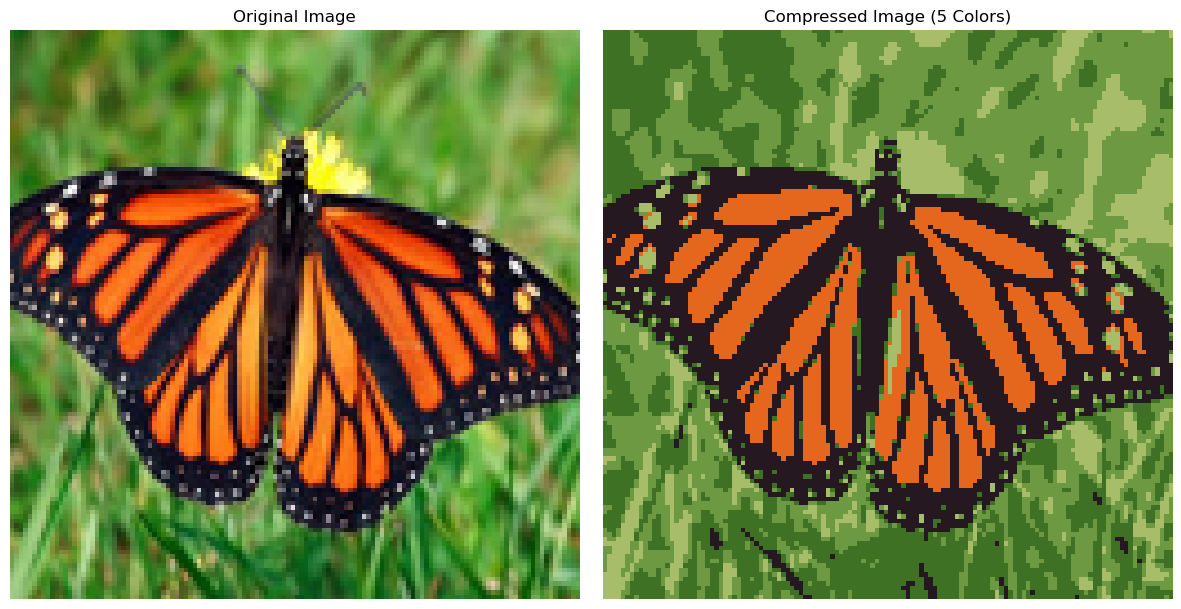

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path =   r'C:\Users\sinch\Downloads\clust.jpg' # Replace with your image path
image = Image.open(image_path)
image = image.resize((128, 128))  # Resize for faster computation if needed
image_data = np.array(image)

# Reshape the image into a 2D array (pixels, RGB)
pixels = image_data.reshape(-1, 3)

# Apply K-Means clustering
n_clusters = 5  # Number of color clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pixels)

# Replace each pixel with its corresponding cluster centroid
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = compressed_pixels.reshape(image_data.shape).astype('uint8')

# Display the original and compressed images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(compressed_image)
axes[1].set_title(f"Compressed Image ({n_clusters} Colors)")
axes[1].axis("off")

plt.tight_layout()
plt.show()
